### Bhagyashree Deshpande

# Perform Clustering (Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

## Import Data

In [2]:
crime_data = pd.read_csv('crime_data.csv')
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


## Data Understanding

In [3]:
crime_data.shape

(50, 5)

In [4]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
crime_data.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [6]:
crime_data.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [7]:
crime_data.describe(include = 'all')

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
count,50,50.00000,50.000000,50.000000,50.000000
unique,50,NaN,NaN,NaN,NaN
top,Alabama,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,7.78800,170.760000,65.540000,21.232000
std,NaN,4.35551,83.337661,14.474763,9.366385
min,NaN,0.80000,45.000000,32.000000,7.300000
25%,NaN,4.07500,109.000000,54.500000,15.075000
50%,NaN,7.25000,159.000000,66.000000,20.100000
75%,NaN,11.25000,249.000000,77.750000,26.175000


In [8]:
crime_data.rename(columns = {"Unnamed: 0":"States"}, inplace=True)
crime_data.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [9]:
crime_data[crime_data.duplicated(keep= False)]

,States,Murder,Assault,UrbanPop,Rape


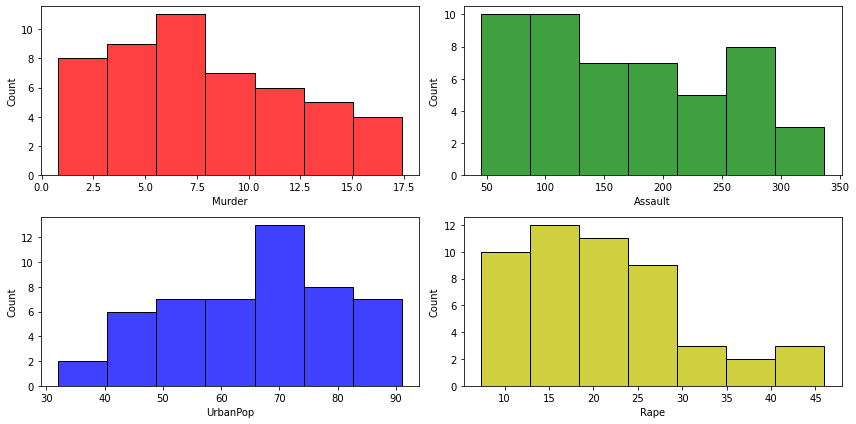

In [10]:
fig, ax = plt.subplots(2, 2, figsize = (12,6))

sns.histplot(crime_data.Murder, ax = ax[0,0], color = 'r', edgecolor = 'black')
sns.histplot(crime_data.Assault, ax = ax[0,1], color = 'g', edgecolor = 'black')
sns.histplot(crime_data.UrbanPop, ax = ax[1,0], color = 'b', edgecolor = 'black')
sns.histplot(crime_data.Rape, ax = ax[1,1], color = 'y', edgecolor = 'black')

plt.tight_layout();

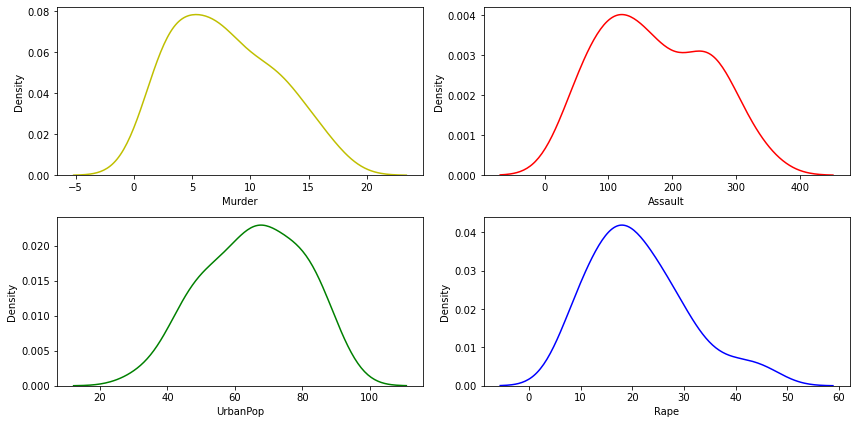

In [11]:
fig, ax = plt.subplots(2, 2, figsize = (12,6))

sns.kdeplot(crime_data.Murder, ax = ax[0,0], color = 'y')
sns.kdeplot(crime_data.Assault, ax = ax[0,1], color = 'r')
sns.kdeplot(crime_data.UrbanPop, ax = ax[1,0], color = 'g')
sns.kdeplot(crime_data.Rape, ax = ax[1,1], color = 'b')

plt.tight_layout();

In [12]:
def norm_func(i):
    X = (i - i.min())/(i.max() - i.min())
    return(X)

In [13]:
norm_data = norm_func(crime_data.iloc[:,1:])
norm_data.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


### Performing Hierarchical Clustering

#### Creating Single Linkage Method

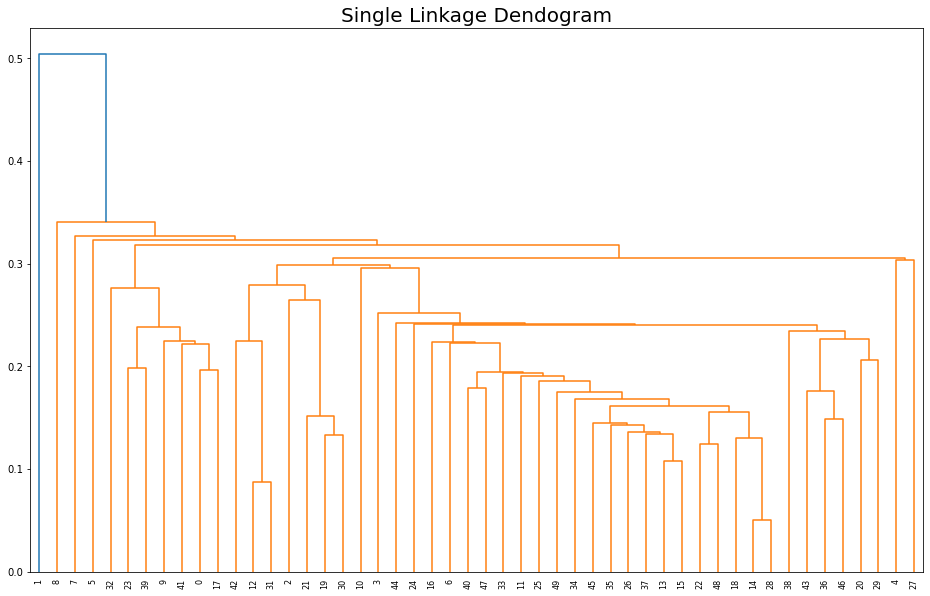

In [14]:
fig = plt.figure(figsize = (16,10))
dendogram = sch.dendrogram(sch.linkage(norm_data, method = 'single'))
plt.title('Single Linkage Dendogram', size = 20);

In [15]:
hc_1 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'single')

In [16]:
y_hc_1 = hc_1.fit_predict(norm_data)

In [17]:
clusters = pd.DataFrame(y_hc_1, columns = ['Clusters'])
crime_data['Cluster'] = y_hc_1

In [18]:
for i in range(2):
    print('Cluster      :', i)
    print('Total Values :', len(list(crime_data[crime_data['Cluster'] == i]['States'].values)))

Cluster      : 0
Total Values : 49
Cluster      : 1
Total Values : 1


#### Creating Complete Linkage Method

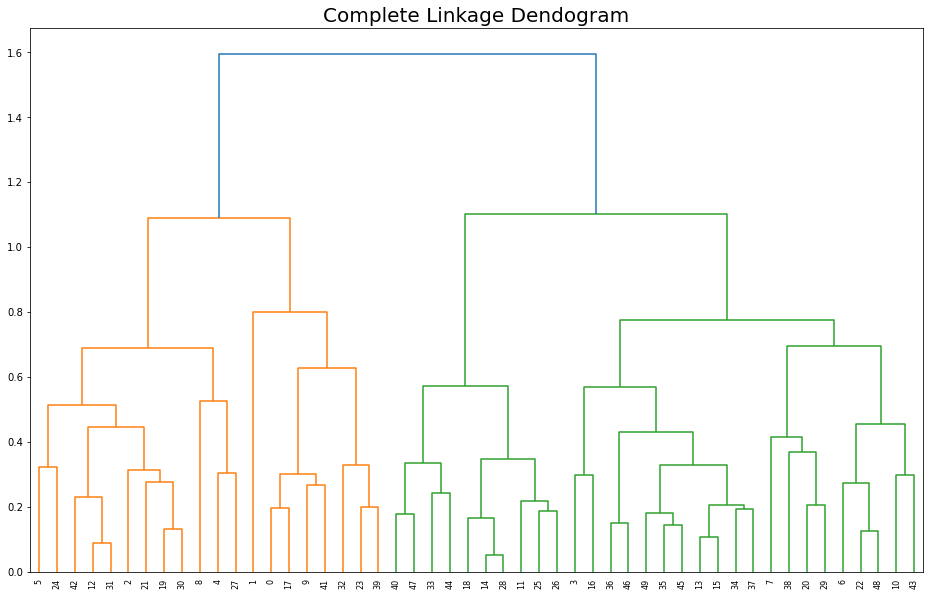

In [19]:
fig = plt.figure(figsize = (16,10))
dendogram = sch.dendrogram(sch.linkage(norm_data, method = 'complete'))
plt.title('Complete Linkage Dendogram', size = 20);

In [20]:
hc_2 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'complete')

In [21]:
y_hc_2 = hc_2.fit_predict(norm_data)

In [22]:
clusters = pd.DataFrame(y_hc_2, columns = ['Clusters'])
crime_data['Cluster'] = y_hc_2

In [23]:
for i in range(4):
    print('Cluster      :', i)
    print('Total Values :', len(list(crime_data[crime_data['Cluster'] == i]['States'].values)))

Cluster      : 0
Total Values : 8
Cluster      : 1
Total Values : 20
Cluster      : 2
Total Values : 10
Cluster      : 3
Total Values : 12


#### Creating Average Linkage Method

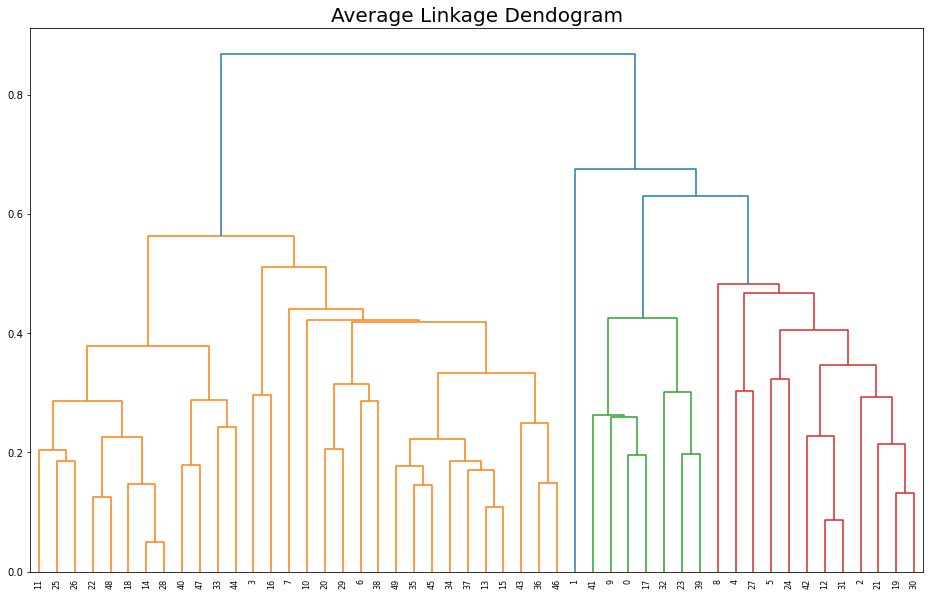

In [24]:
fig = plt.figure(figsize = (16,10))
dendogram = sch.dendrogram(sch.linkage(norm_data, method = 'average'))
plt.title('Average Linkage Dendogram', size = 20);

In [25]:
hc_3 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'average')

In [26]:
y_hc_3 = hc_3.fit_predict(norm_data)

In [27]:
clusters = pd.DataFrame(y_hc_3, columns = ['Clusters'])
crime_data['Cluster'] = y_hc_3

In [28]:
for i in range(4):
    print('Cluster      :', i)
    print('Total Values :', len(list(crime_data[crime_data['Cluster'] == i]['States'].values)))

Cluster      : 0
Total Values : 30
Cluster      : 1
Total Values : 12
Cluster      : 2
Total Values : 1
Cluster      : 3
Total Values : 7


#### Creating Centroid(Ward) Linkage Method

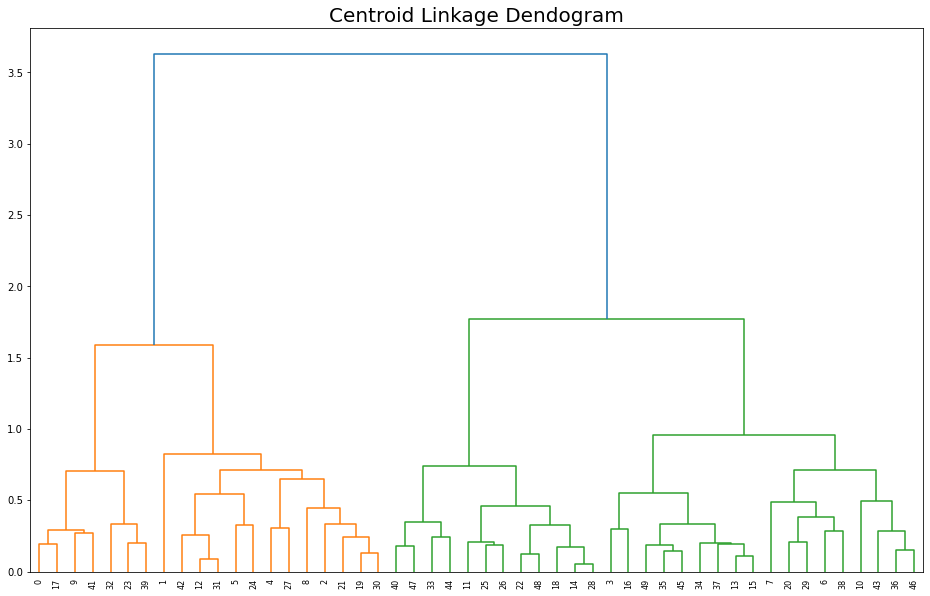

In [29]:
fig = plt.figure(figsize = (16,10))
dendogram = sch.dendrogram(sch.linkage(norm_data, method = 'ward'))
plt.title('Centroid Linkage Dendogram', size = 20);

In [30]:
hc_4 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')

In [31]:
y_hc_4 = hc_4.fit_predict(norm_data)

In [32]:
clusters = pd.DataFrame(y_hc_4, columns = ['Clusters'])
crime_data['Cluster'] = y_hc_4

In [33]:
for i in range(4):
    print('Cluster      :', i)
    print('Total Values :', len(list(crime_data[crime_data['Cluster'] == i]['States'].values)))

Cluster      : 0
Total Values : 18
Cluster      : 1
Total Values : 13
Cluster      : 2
Total Values : 12
Cluster      : 3
Total Values : 7


### Creating K-Means Clustering

In [34]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 12)
    kmeans.fit(norm_data)
    wcss.append(kmeans.inertia_)

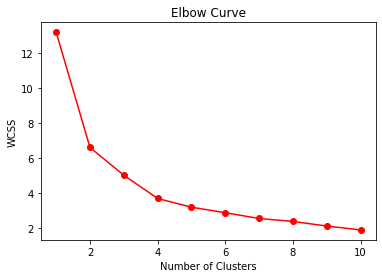

In [35]:
plt.plot(range(1,11), wcss, 'bo-', color = 'r')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

From the above Elbow curve we can say that 4 clusters can be formed.

In [36]:
clusters_new = KMeans(4, random_state = 31)
clusters_new.fit(norm_data)

KMeans(n_clusters=4, random_state=31)

In [37]:
km_label = clusters_new.labels_
crime_data['Cluster'] = clusters_new.labels_

In [38]:
for i in range(4):
    print('Cluster      :', i)
    print('Total Values :', len(list(crime_data[crime_data['Cluster'] == i]['States'].values)))

Cluster      : 0
Total Values : 13
Cluster      : 1
Total Values : 13
Cluster      : 2
Total Values : 16
Cluster      : 3
Total Values : 8


### Creating DBSCAN Clustering

In [39]:
dbscan = DBSCAN(eps = 0.3, min_samples = 3)
dbscan.fit(norm_data)

DBSCAN(eps=0.3, min_samples=3)

In [40]:
dbscan_label = dbscan.labels_
cl = pd.DataFrame(dbscan_label, columns = ['Cluster_DB'])
cl.head()

,Cluster_DB
0,0
1,-1
2,1
3,1
4,-1


In [41]:
crime_data['Cluster_DBSCAN'] = cl.Cluster_DB

### Evaluating Clustering methods with the help of Silhouette Score

The Silhouette Score metric calculates the goodness of the clustering techniques and it ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

In [43]:
silhouette_SLM = (metrics.silhouette_score(norm_data,y_hc_1))
silhouette_SLM

0.21033337025958493

In [44]:
silhouette_CLM = (metrics.silhouette_score(norm_data,y_hc_2))
silhouette_CLM

0.30607294424263076

In [45]:
silhouette_ALM = (metrics.silhouette_score(norm_data,y_hc_3))
silhouette_ALM

0.3699239114027717

In [49]:
silhouette_CenLM = (metrics.silhouette_score(norm_data,y_hc_4))
silhouette_CenLM

0.3298707379986785

In [47]:
silhouette_KMeans = (metrics.silhouette_score(norm_data,km_label))
silhouette_KMeans

0.3349095719865253

In [48]:
silhouette_DBSCAN = (metrics.silhouette_score(norm_data,cl.Cluster_DB))
silhouette_DBSCAN

0.24738588099272632

In [50]:
table = {'Clustering Models' : ['HC Single Linkage', 'HC Complete Linkage', 'HC Average Linkage', 'HC Centroid Linkage', 'KMeans', 'DBSCAN'], 'Silhouette Score' : [silhouette_SLM, silhouette_CLM, silhouette_ALM, silhouette_CenLM, silhouette_KMeans, silhouette_DBSCAN]}
table = pd.DataFrame(table)
table

,Clustering Models,Silhouette Score
0,HC Single Linkage,0.210333
1,HC Complete Linkage,0.329871
2,HC Average Linkage,0.369924
3,HC Centroid Linkage,0.329871
4,KMeans,0.334910
5,DBSCAN,0.247386


## Conclusion

From the above table, it is evident that different types of hierarchical clustering is way more complex to understand and Average Linkage is giving better result compared to other hierarchical clustering. Of all the clustering methods KMeans Clustering also provides the better result with 4 clusters.

## ========================================================================

# Perform clustering (Hierarchical, K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
# Draw the inferences from the clusters obtained.

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.preprocessing import power_transform
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

## Import Data

In [2]:
airlines_data = pd.read_excel('EastWestAirlines.xlsx', sheet_name = 'data')
airlines_data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


## Data Understanding

In [3]:
airlines_data.shape

(3999, 12)

In [4]:
data = airlines_data.drop('ID#', axis = 1)
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
data.shape

(3999, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [7]:
data.dtypes

Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [8]:
airlines_data.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [9]:
data.describe(include = 'all')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [10]:
data[airlines_data.duplicated(keep = False)]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


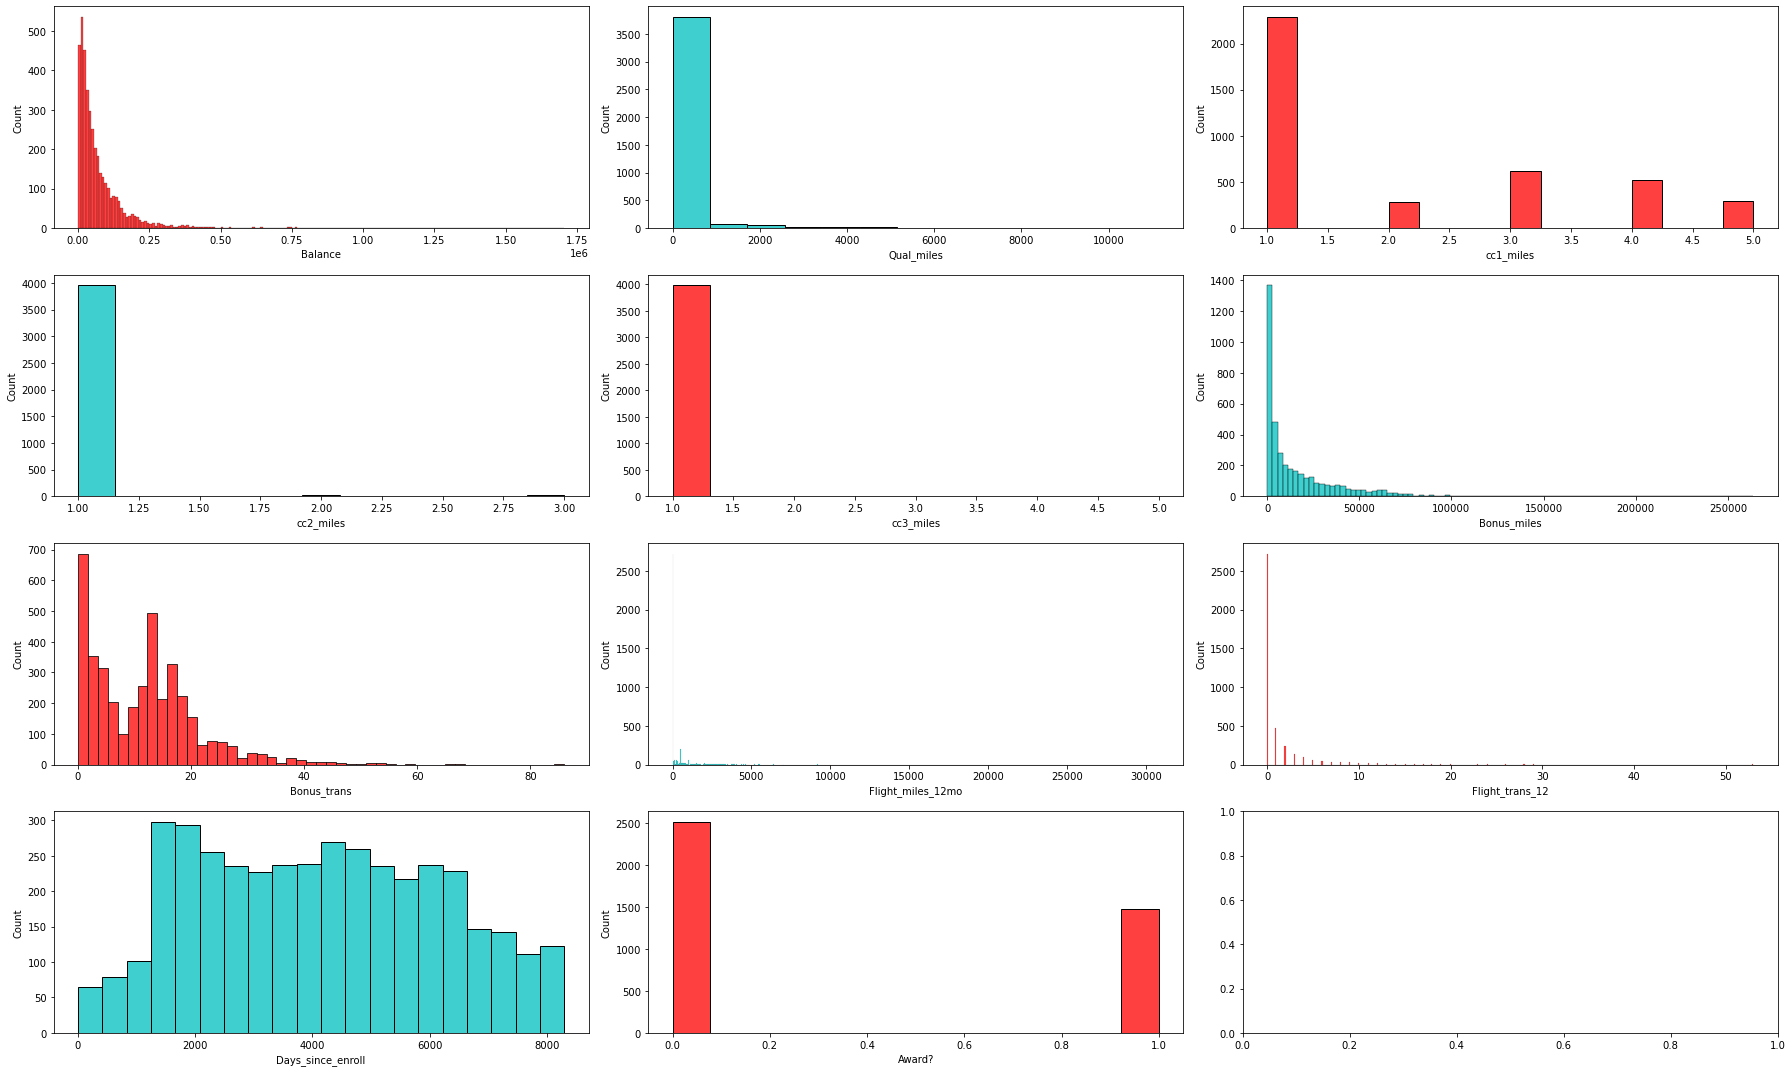

In [13]:
fig, ax = plt.subplots(4, 3, figsize = (25,15))

sns.histplot(data.Balance, ax = ax[0,0], color = 'r')
sns.histplot(data.Qual_miles, ax = ax[0,1], color = 'c')
sns.histplot(data.cc1_miles, ax = ax[0,2], color = 'r')
sns.histplot(data.cc2_miles, ax = ax[1,0], color = 'c')
sns.histplot(data.cc3_miles, ax = ax[1,1], color = 'r')
sns.histplot(data.Bonus_miles, ax = ax[1,2], color = 'c')
sns.histplot(data.Bonus_trans, ax = ax[2,0], color = 'r')
sns.histplot(data.Flight_miles_12mo, ax = ax[2,1], color = 'c')
sns.histplot(data.Flight_trans_12, ax = ax[2,2], color = 'r')
sns.histplot(data.Days_since_enroll, ax = ax[3,0], color = 'c')
sns.histplot(data['Award?'], ax = ax[3,1], color = 'r')

plt.tight_layout();

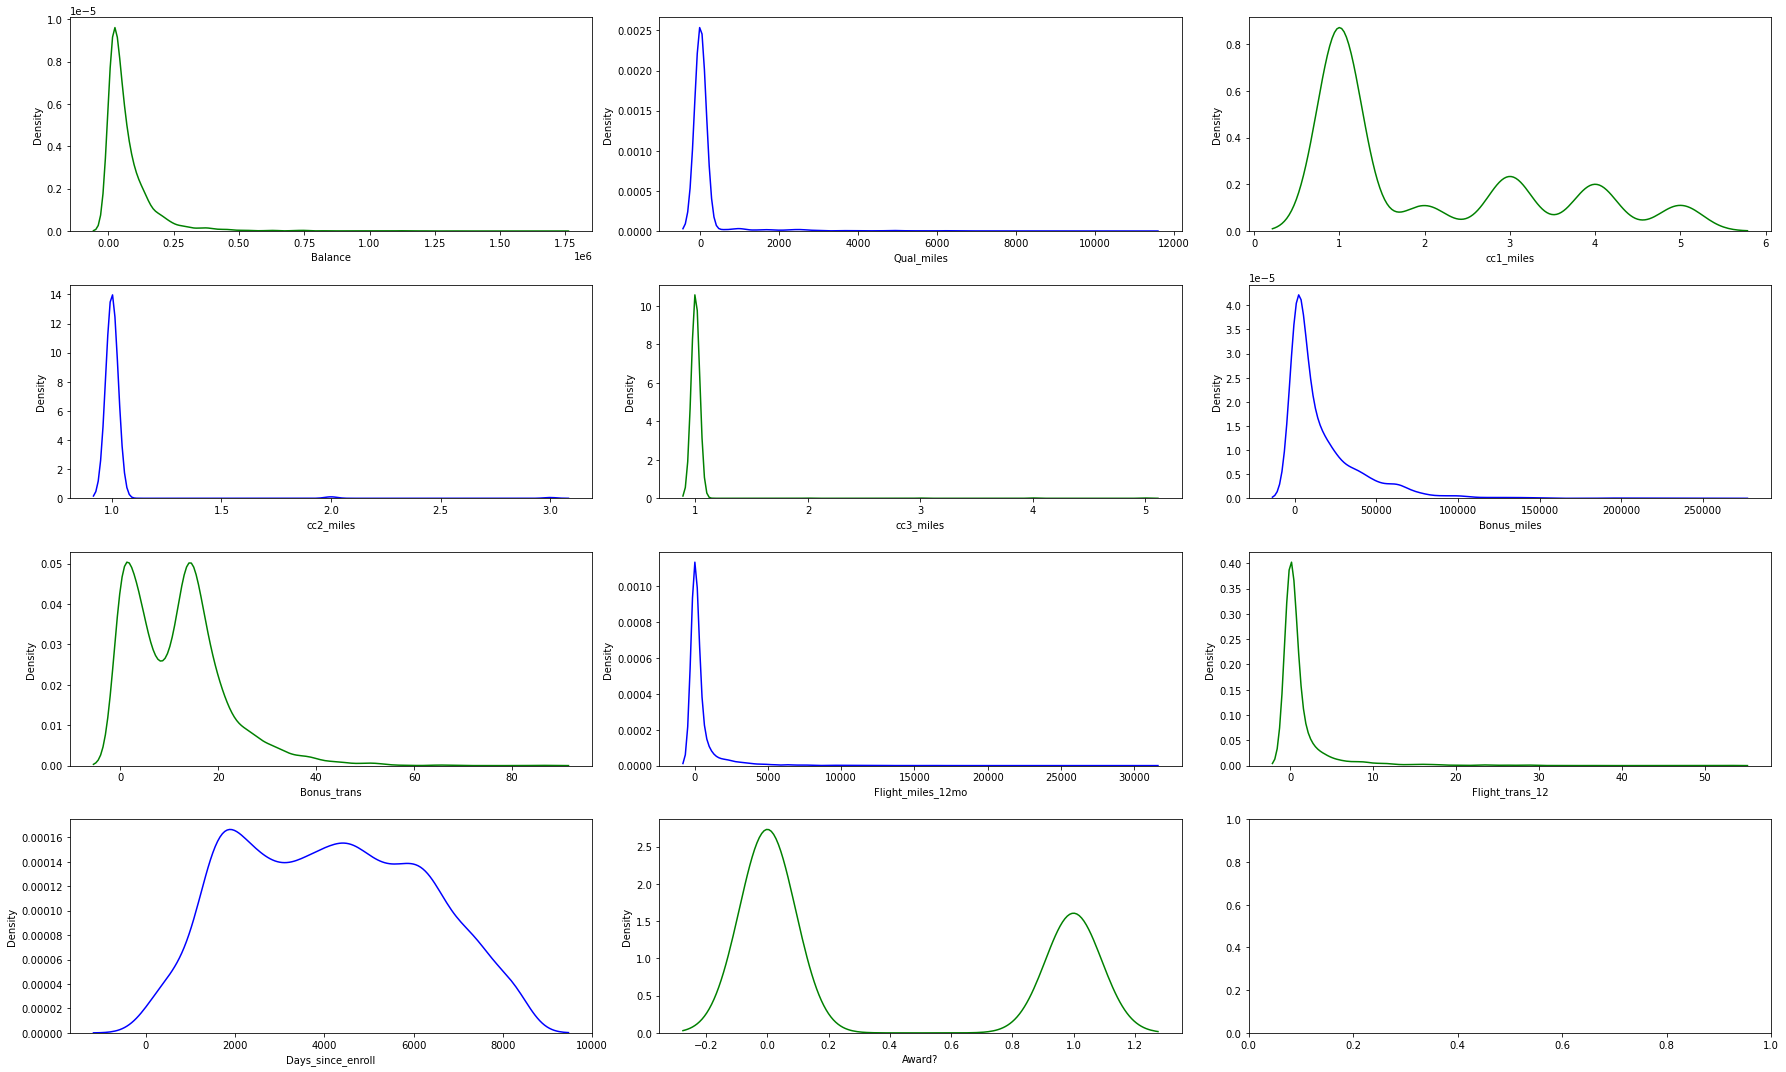

In [14]:
fig, ax = plt.subplots(4, 3, figsize = (25,15))

sns.kdeplot(data.Balance, ax = ax[0,0], color = 'g')
sns.kdeplot(data.Qual_miles, ax = ax[0,1], color = 'b')
sns.kdeplot(data.cc1_miles, ax = ax[0,2], color = 'g')
sns.kdeplot(data.cc2_miles, ax = ax[1,0], color = 'b')
sns.kdeplot(data.cc3_miles, ax = ax[1,1], color = 'g')
sns.kdeplot(data.Bonus_miles, ax = ax[1,2], color = 'b')
sns.kdeplot(data.Bonus_trans, ax = ax[2,0], color = 'g')
sns.kdeplot(data.Flight_miles_12mo, ax = ax[2,1], color = 'b')
sns.kdeplot(data.Flight_trans_12, ax = ax[2,2], color = 'g')
sns.kdeplot(data.Days_since_enroll, ax = ax[3,0], color = 'b')
sns.kdeplot(data['Award?'], ax = ax[3,1], color = 'g')

plt.tight_layout();

In [16]:
airlines_new = data[['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll', 'Award?']]
airlines_transform = power_transform(airlines_new, method = 'yeo-johnson')

In [17]:
airlines_new = pd.DataFrame(airlines_transform, columns = ['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll', 'Award?'])
airlines_new

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.346816,-0.244743,-0.844766,0.0,0.0,-1.178402,-1.329671,-0.683308,-0.674970,1.321776,-0.766919
1,-0.633084,-0.244743,-0.844766,0.0,0.0,-1.132416,-1.074960,-0.683308,-0.674970,1.308873,-0.766919
2,-0.038549,-0.244743,-0.844766,0.0,0.0,-0.191941,-0.688822,-0.683308,-0.674970,1.335468,-0.766919
3,-0.821989,-0.244743,-0.844766,0.0,0.0,-0.924946,-1.329671,-0.683308,-0.674970,1.302415,-0.766919
4,0.723596,-0.244743,1.343165,0.0,0.0,1.169363,1.329711,1.549026,1.685925,1.295549,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.662730,-0.244743,-0.844766,0.0,0.0,0.153811,-0.688822,1.346970,1.081077,-1.364712,1.303918
3995,0.340486,-0.244743,-0.844766,0.0,0.0,-0.727886,-0.530613,-0.683308,-0.674970,-1.369774,1.303918
3996,0.460388,-0.244743,1.058591,0.0,0.0,0.795077,-0.134235,-0.683308,-0.674970,-1.365345,1.303918
3997,0.200904,-0.244743,-0.844766,0.0,0.0,-0.924946,-1.329671,1.446453,1.081077,-1.365977,-0.766919


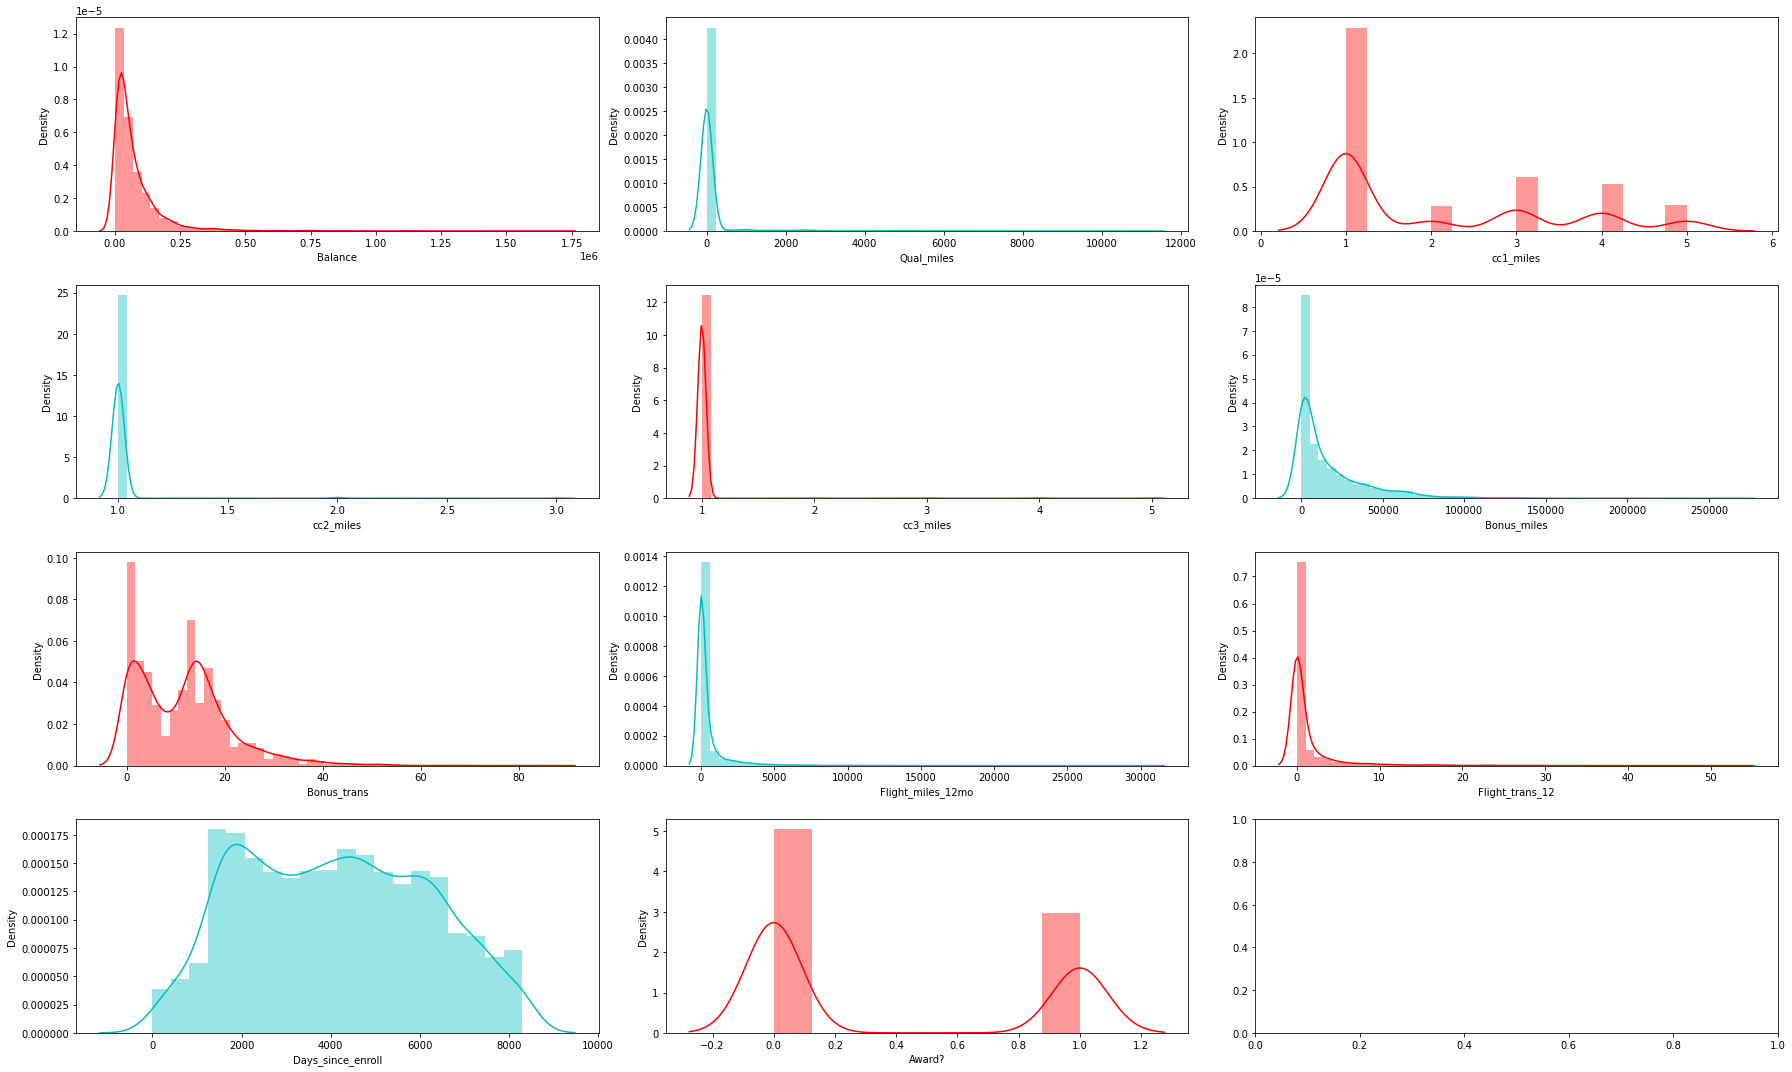

In [18]:
fig, ax = plt.subplots(4, 3, figsize = (25,15))

sns.distplot(data.Balance, ax = ax[0,0], color = 'r')
sns.distplot(data.Qual_miles, ax = ax[0,1], color = 'c')
sns.distplot(data.cc1_miles, ax = ax[0,2], color = 'r')
sns.distplot(data.cc2_miles, ax = ax[1,0], color = 'c')
sns.distplot(data.cc3_miles, ax = ax[1,1], color = 'r')
sns.distplot(data.Bonus_miles, ax = ax[1,2], color = 'c')
sns.distplot(data.Bonus_trans, ax = ax[2,0], color = 'r')
sns.distplot(data.Flight_miles_12mo, ax = ax[2,1], color = 'c')
sns.distplot(data.Flight_trans_12, ax = ax[2,2], color = 'r')
sns.distplot(data.Days_since_enroll, ax = ax[3,0], color = 'c')
sns.distplot(data['Award?'], ax = ax[3,1], color = 'r')

plt.tight_layout();

### Performing Hierarchical Clustering

#### Creating Single Linkage method

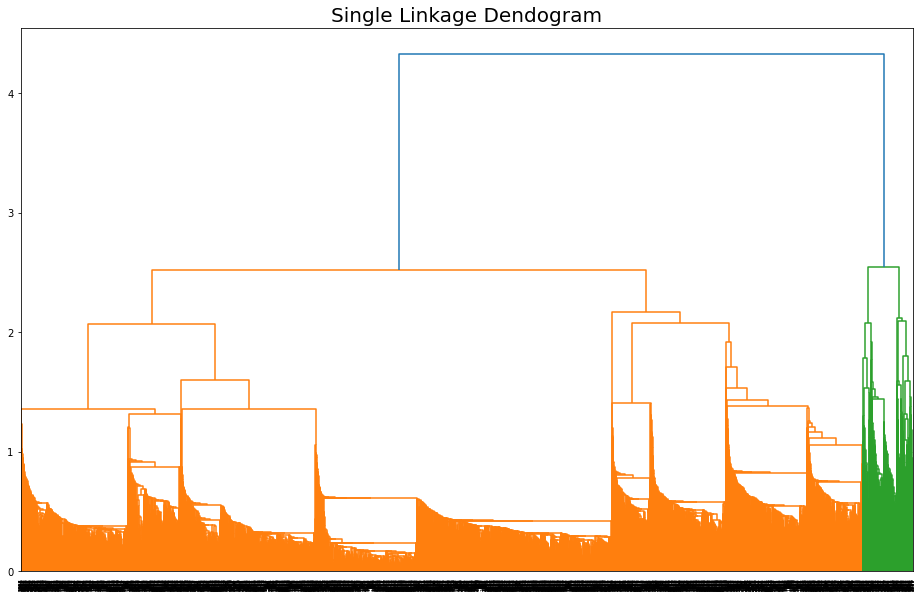

In [19]:
fig = plt.figure(figsize = (16,10))
dendogram = sch.dendrogram(sch.linkage(airlines_transform, method = 'single'))
plt.title('Single Linkage Dendogram', size = 20);

In [20]:
hc_1 = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'single')

In [21]:
y_hc_1 = hc_1.fit_predict(airlines_transform)

In [22]:
clusters = pd.DataFrame(y_hc_1, columns = ['Clusters'])
airlines_data['Cluster'] = y_hc_1

In [23]:
for i in range(5):
    print('Cluster      :', i)
    print('Total Values :', len(list(airlines_data[airlines_data['Cluster'] == i]['ID#'].values)))

Cluster      : 0
Total Values : 75
Cluster      : 1
Total Values : 151
Cluster      : 2
Total Values : 1
Cluster      : 3
Total Values : 2648
Cluster      : 4
Total Values : 1124


#### Creating Complete Linkage Method

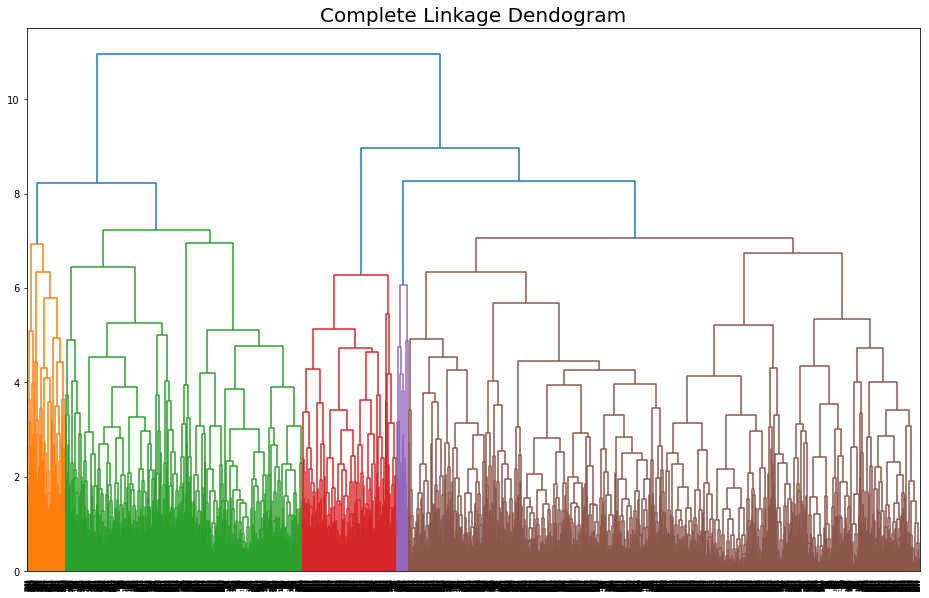

In [24]:
fig = plt.figure(figsize = (16,10))
dendogram = sch.dendrogram(sch.linkage(airlines_transform, method = 'complete'))
plt.title('Complete Linkage Dendogram', size = 20);

In [25]:
hc_2 = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')

In [26]:
y_hc_2 = hc_2.fit_predict(airlines_transform)

In [27]:
clusters = pd.DataFrame(y_hc_2, columns = ['Clusters'])
airlines_data['Cluster'] = y_hc_2

In [28]:
for i in range(5):
    print('Cluster      :', i)
    print('Total Values :', len(list(airlines_data[airlines_data['Cluster'] == i]['ID#'].values)))

Cluster      : 0
Total Values : 1061
Cluster      : 1
Total Values : 2288
Cluster      : 2
Total Values : 424
Cluster      : 3
Total Values : 53
Cluster      : 4
Total Values : 173


#### Creating Average Linkage Method

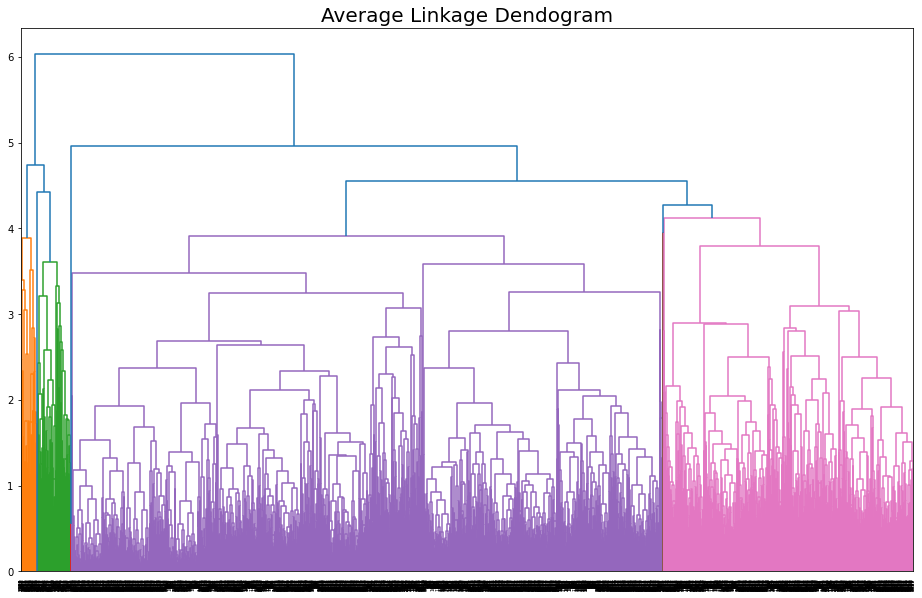

In [29]:
fig = plt.figure(figsize = (16,10))
dendogram = sch.dendrogram(sch.linkage(airlines_transform, method = 'average'))
plt.title('Average Linkage Dendogram', size = 20);

In [30]:
hc_3 = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'average')

In [34]:
y_hc_3 = hc_3.fit_predict(airlines_transform)

In [35]:
clusters = pd.DataFrame(y_hc_3, columns = ['Clusters'])
airlines_data['Cluster'] = y_hc_3

In [36]:
for i in range(5):
    print('Cluster      :', i)
    print('Total Values :', len(list(airlines_data[airlines_data['Cluster'] == i]['ID#'].values)))

Cluster      : 0
Total Values : 151
Cluster      : 1
Total Values : 1123
Cluster      : 2
Total Values : 2
Cluster      : 3
Total Values : 75
Cluster      : 4
Total Values : 2648


#### Creating Centroid(Ward) Linkage Method

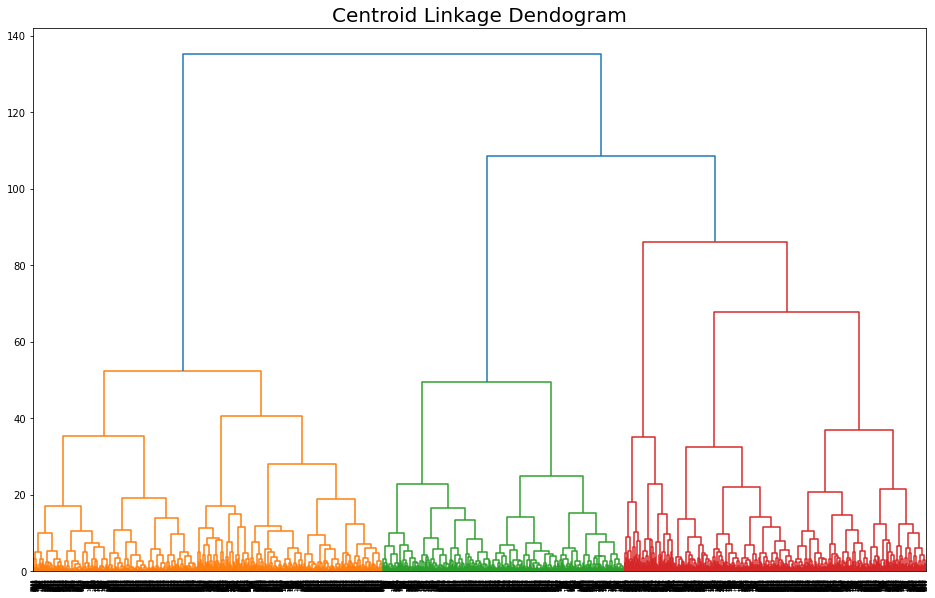

In [38]:
fig = plt.figure(figsize = (16,10))
dendogram = sch.dendrogram(sch.linkage(airlines_transform, method = 'ward'))
plt.title('Centroid Linkage Dendogram', size = 20);

In [39]:
hc_4 = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')

In [40]:
y_hc_4 = hc_4.fit_predict(airlines_transform)

In [41]:
clusters = pd.DataFrame(y_hc_4, columns = ['Clusters'])
airlines_data['Cluster'] = y_hc_4

In [42]:
for i in range(5):
    print('Cluster      :', i)
    print('Total Values :', len(list(airlines_data[airlines_data['Cluster'] == i]['ID#'].values)))

Cluster      : 0
Total Values : 1567
Cluster      : 1
Total Values : 592
Cluster      : 2
Total Values : 1081
Cluster      : 3
Total Values : 226
Cluster      : 4
Total Values : 533


### Creating K-Means Clustering

In [43]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 13)
    kmeans.fit(airlines_transform)
    wcss.append(kmeans.inertia_)

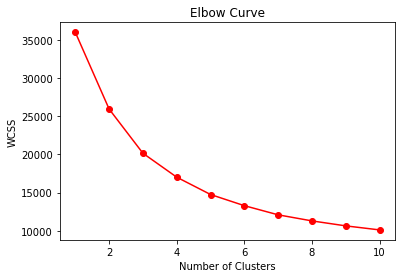

In [44]:
plt.plot(range(1,11), wcss, 'bo-', color = 'r')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

From the above Elbow Curve we can say that we get 5 clusters.

In [64]:
clusters_new = KMeans(5, random_state = 42)
clusters_new.fit(airlines_transform)

KMeans(n_clusters=5, random_state=42)

In [65]:
km_label = clusters_new.labels_
airlines_data['Cluster'] = clusters_new.labels_

In [66]:
for i in range(5):
    print('Cluster      :', i)
    print('Total Values :', len(list(airlines_data[airlines_data['Cluster'] == i]['ID#'].values)))

Cluster      : 0
Total Values : 1474
Cluster      : 1
Total Values : 1179
Cluster      : 2
Total Values : 573
Cluster      : 3
Total Values : 551
Cluster      : 4
Total Values : 222


### Creating DBSCAN Clustering

In [48]:
dbscan = DBSCAN(eps = 0.9, min_samples = 8)
dbscan.fit(airlines_new)

DBSCAN(eps=0.9, min_samples=8)

In [49]:
cl = pd.DataFrame(dbscan.labels_, columns = ['Cluster DB'])
cl.head()

,Cluster DB
0,0
1,0
2,0
3,0
4,1


In [50]:
airlines_new_2 = pd.concat([airlines_data, cl], axis = 1)
airlines_new_2.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster,Cluster DB
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1


In [51]:
airlines_data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


### Evaluating Clustering methods with the help of Silhouette Score

The Silhouette Score metric calculates the goodness of the clustering techniques and it ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

In [52]:
silhouette_SLM = (metrics.silhouette_score(airlines_transform,y_hc_1))
silhouette_SLM

0.2971406781364072

In [53]:
silhouette_CLM = (metrics.silhouette_score(airlines_transform,y_hc_2))
silhouette_CLM

0.19985213995606269

In [54]:
silhouette_ALM = (metrics.silhouette_score(airlines_transform,y_hc_3))
silhouette_ALM

0.24511194875209383

In [55]:
silhouette_CenLM = (metrics.silhouette_score(airlines_transform,y_hc_4))
silhouette_CenLM

0.3240550069814065

In [67]:
silhouette_KMeans = (metrics.silhouette_score(airlines_transform,km_label))
silhouette_KMeans

0.32518610185189556

In [61]:
silhouette_DBSCAN = (metrics.silhouette_score(airlines_transform,airlines_new_2['Cluster DB']))
silhouette_DBSCAN

0.24472627577594885

In [68]:
table = {'Clustering Models' : ['HC Single Linkage', 'HC Complete Linkage', 'HC Average Linkage', 'HC Centroid Linkage', 'KMeans', 'DBSCAN'], 'Silhouette Score' : [silhouette_SLM, silhouette_CLM, silhouette_ALM, silhouette_CenLM, silhouette_KMeans, silhouette_DBSCAN]}
table = pd.DataFrame(table)
table

,Clustering Models,Silhouette Score
0,HC Single Linkage,0.297141
1,HC Complete Linkage,0.199852
2,HC Average Linkage,0.245112
3,HC Centroid Linkage,0.324055
4,KMeans,0.325186
5,DBSCAN,0.244726


## Conclusion

From the above table, it is evident that different types of hierarchical clustering is way more complex to understand and Centroid Linkage is giving better result compared to other hierarchical clustering. Of all the clustering methods KMeans Clustering also provides the better result with 5 clusters.